In [1]:
# Extarct dataset from Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:07<00:00, 195MB/s]
100% 1.06G/1.06G [00:08<00:00, 142MB/s]


In [3]:
# Unzip the dataset

import zipfile
zip = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip.extractall('/content')
zip.close()

In [9]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
# will use generators to handle large dataset

train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_data = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize the values from 0 to 1 of image which is currently 0 to 255.

def map_image(image, label):
  image = tensorflow.cast(image/255, tensorflow.float32)
  return image, label

train_data = train_data.map(map_image)
validation_data  = validation_data.map(map_image)

In [7]:
type(train_data)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [8]:
# shape(32,256,256,3) - 32 is batch size, 256*256 image and 3 is for RGB channel.
for i in train_data:
  print(i)
  break

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[8.74911174e-02, 9.07203853e-02, 1.19296297e-01],
         [1.83705762e-01, 1.67720780e-01, 1.50557995e-01],
         [2.24515066e-01, 1.97114989e-01, 1.25472486e-01],
         ...,
         [3.50149304e-01, 3.40066910e-01, 2.81237930e-01],
         [5.32915890e-01, 5.09386480e-01, 4.47324783e-01],
         [5.38587630e-01, 5.07015944e-01, 4.39956665e-01]],

        [[2.05537900e-01, 2.15157986e-01, 1.74943626e-01],
         [2.43250027e-01, 2.34603882e-01, 1.68889716e-01],
         [2.35853255e-01, 2.09197819e-01, 1.27958536e-01],
         ...,
         [1.74009413e-01, 1.50479987e-01, 9.89021733e-02],
         [2.95517474e-01, 2.71988064e-01, 2.17696398e-01],
         [5.52453995e-01, 5.28924584e-01, 4.71286446e-01]],

        [[1.07207417e-01, 1.16873465e-01, 4.79280651e-02],
         [1.33697927e-01, 1.20049030e-01, 4.49622050e-02],
         [1.40958622e-01, 9.54316705e-02, 3.55103128e-02],
         ...,
         

CNN Model

In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [14]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
logs = model.fit(train_data, epochs=20, validation_data = validation_data)

Epoch 1/20
625/625 [==============================] - 66s 90ms/step - loss: 0.6245 - accuracy: 0.6399 - val_loss: 0.5326 - val_accuracy: 0.7378
Epoch 2/20
625/625 [==============================] - 59s 94ms/step - loss: 0.5013 - accuracy: 0.7527 - val_loss: 0.4853 - val_accuracy: 0.7664
Epoch 3/20
625/625 [==============================] - 56s 90ms/step - loss: 0.4003 - accuracy: 0.8159 - val_loss: 0.5046 - val_accuracy: 0.7732
Epoch 4/20
625/625 [==============================] - 57s 90ms/step - loss: 0.2730 - accuracy: 0.8830 - val_loss: 0.6882 - val_accuracy: 0.7878
Epoch 5/20
625/625 [==============================] - 58s 92ms/step - loss: 0.1551 - accuracy: 0.9409 - val_loss: 0.8100 - val_accuracy: 0.7732
Epoch 6/20
625/625 [==============================] - 57s 90ms/step - loss: 0.0843 - accuracy: 0.9690 - val_loss: 1.1609 - val_accuracy: 0.7674
Epoch 7/20
625/625 [==============================] - 75s 119ms/step - loss: 0.0635 - accuracy: 0.9786 - val_loss: 1.0510 - val_accuracy

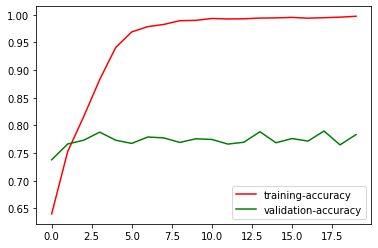

In [16]:
# Plot loss and accuracy graphs

import matplotlib.pyplot as plt

plt.plot(logs.history['accuracy'], color='red', label='training-accuracy')
plt.plot(logs.history['val_accuracy'], color='green', label='validation-accuracy')
plt.legend()
plt.show()

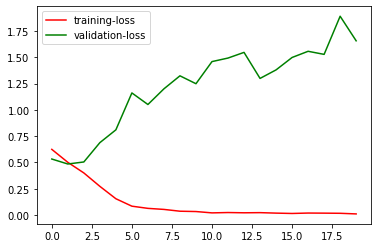

In [17]:
# We can see there is Overfiiting in this.

plt.plot(logs.history['loss'], color='red', label='training-loss')
plt.plot(logs.history['val_loss'], color='green', label='validation-loss')
plt.legend()
plt.show()

Using Dropout layers and Batch Normalization to reduce Overfitting


In [10]:
# Using Dropout layers and Batch Normalization to reduce Overfitting
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [12]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
logs = model.fit(train_data, epochs=20, validation_data = validation_data)

Epoch 1/20
625/625 [==============================] - 83s 117ms/step - loss: 1.6231 - accuracy: 0.5545 - val_loss: 0.6633 - val_accuracy: 0.6182
Epoch 2/20
625/625 [==============================] - 72s 115ms/step - loss: 0.6444 - accuracy: 0.6363 - val_loss: 0.6478 - val_accuracy: 0.6048
Epoch 3/20
625/625 [==============================] - 73s 116ms/step - loss: 0.5736 - accuracy: 0.7003 - val_loss: 0.5354 - val_accuracy: 0.7192
Epoch 4/20
625/625 [==============================] - 73s 116ms/step - loss: 0.5014 - accuracy: 0.7574 - val_loss: 0.5042 - val_accuracy: 0.7488
Epoch 5/20
625/625 [==============================] - 72s 115ms/step - loss: 0.4401 - accuracy: 0.7958 - val_loss: 0.5239 - val_accuracy: 0.7584
Epoch 6/20
625/625 [==============================] - 72s 115ms/step - loss: 0.3948 - accuracy: 0.8223 - val_loss: 0.5310 - val_accuracy: 0.7474
Epoch 7/20
625/625 [==============================] - 74s 119ms/step - loss: 0.3326 - accuracy: 0.8548 - val_loss: 0.4375 - val_ac

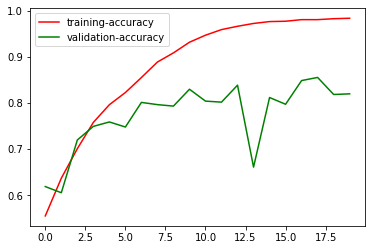

In [15]:
import matplotlib.pyplot as plt

plt.plot(logs.history['accuracy'], color='red', label='training-accuracy')
plt.plot(logs.history['val_accuracy'], color='green', label='validation-accuracy')
plt.legend()
plt.show()

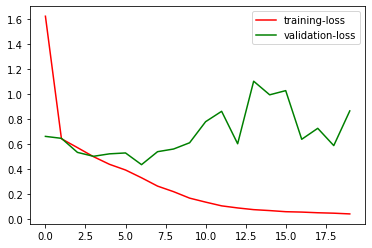

In [16]:
plt.plot(logs.history['loss'], color='red', label='training-loss')
plt.plot(logs.history['val_loss'], color='green', label='validation-loss')
plt.legend()
plt.show()

# Overfitting reduced compare to previous model

Testing the Predictions on new samples

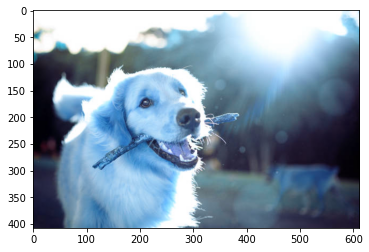

In [34]:
import cv2

test_image = cv2.imread('/content/dog.jpg')

plt.imshow(test_image)

In [35]:
test_image.shape

(408, 612, 3)

In [36]:
test_image = cv2.resize(test_image, (256,256))

In [37]:
test_image.shape

(256, 256, 3)

In [38]:
# as we have 4-D Tensor so we are using Batch Size as 1 here

test_image = test_image.reshape(1,256,256,3)

In [39]:
model.predict(test_image)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)